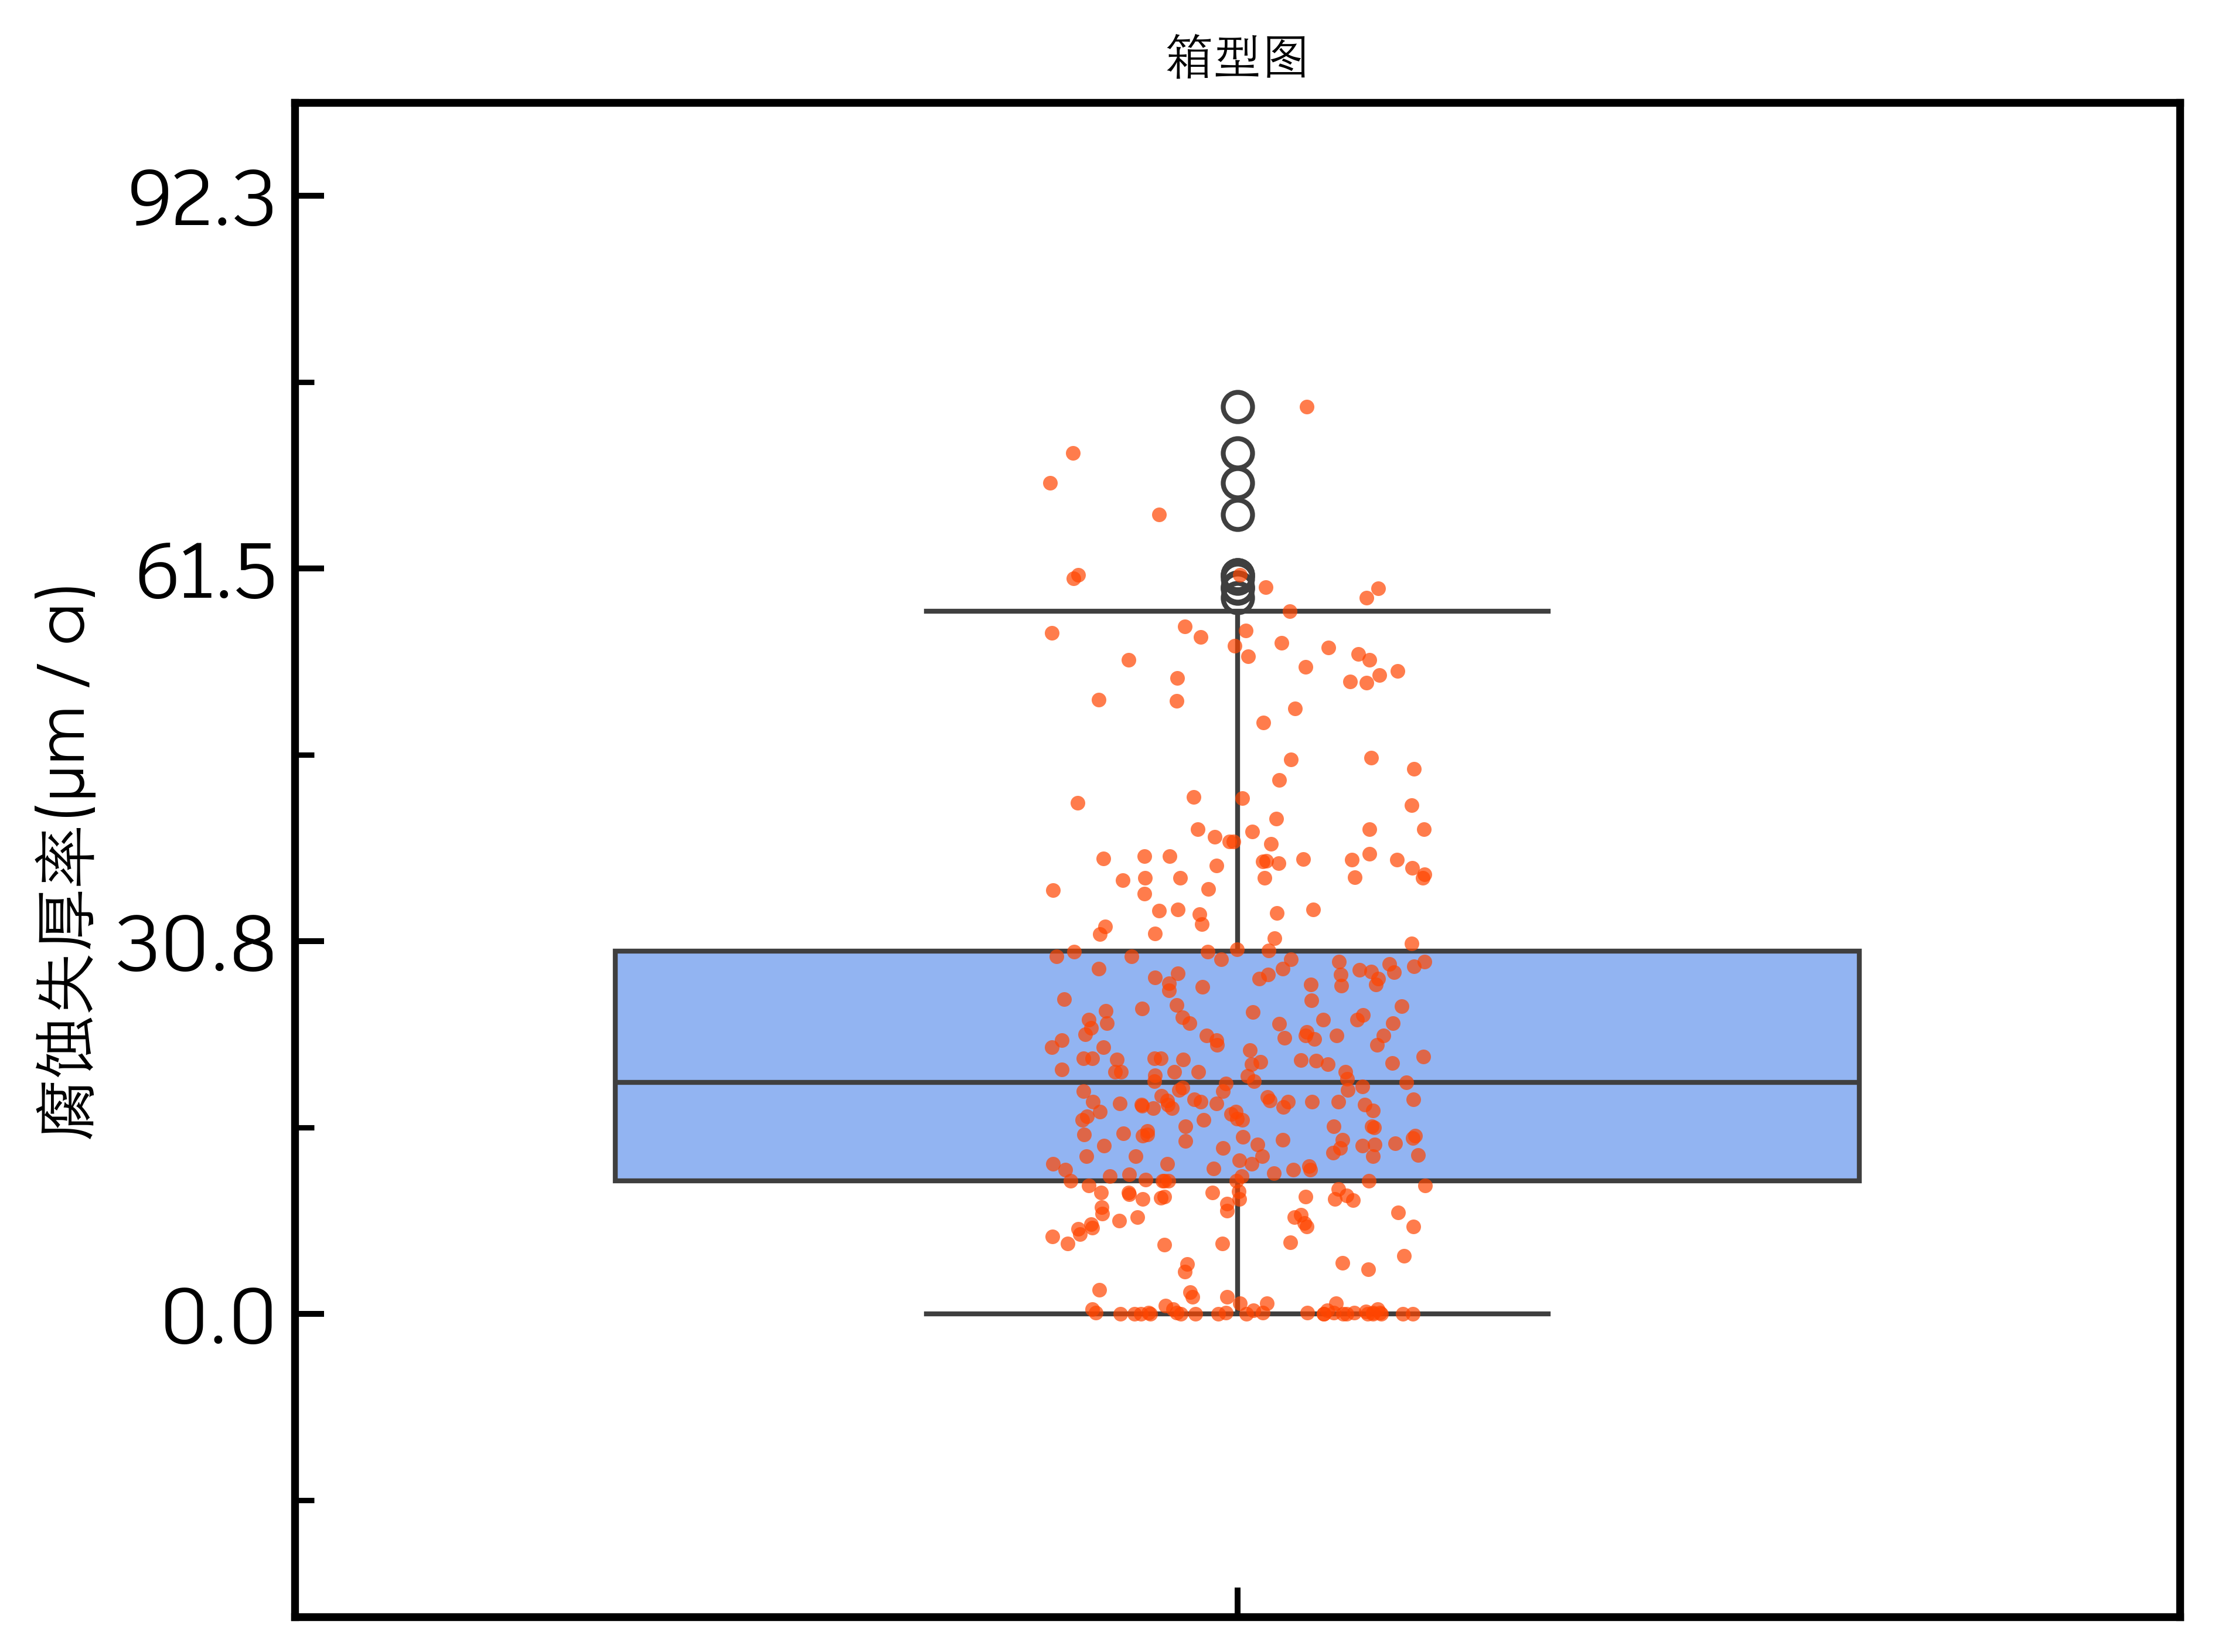

下限： -17.424999999999997 上限： 58.375
异常值如下：
异常index
4      66.000000
38     71.050000
48     59.100000
57     74.900000
67     68.583333
71     61.000000
75     61.000000
288    59.900000
318    60.700000
327    60.000000
Name: 腐蚀失厚率, dtype: float64


<Figure size 640x480 with 0 Axes>

In [139]:
# 箱线图及异常值检测
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.font_manager import FontProperties

font_path = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc'
                           )  # 你需要替换为 'STKaiti' 字体在你的系统中的实际路径
plt.figure(dpi=600)                                                          # 调整分辨率
df = pd.read_excel('/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/delcor_avg_human_腐蚀数据.xlsx')
ax = plt.gca()
# 设置图片大小
sns.boxplot(y=df['腐蚀失厚率'],
            width=0.66,
            boxprops=dict(facecolor=(0.39216, 0.58431, 0.92941, 0.7)))
sns.stripplot(y=df['腐蚀失厚率'], data=df, color="orangered", alpha=0.7, size=3)
# Swarn plot和stripplot比较类似，但Swarn plot的不同之处在于它不会重叠数据点
# sns.boxplot(y=df['Vcorr'],data=df)
# sns.swarmplot( y=df['Vcorr'], data=df, color="grey")
# sns.set_theme(style="whitegrid", font='STHeitiSC-Light')
# plt.rcParams['font.sans-serif'] = ['STHeitiSC-Light']
plt.rcParams["axes.linewidth"] = 20  # 设置边框粗细
plt.yticks(np.linspace(0, 800, 27), fontsize=10)  # 设置横坐标刻度、字体大小、坐标原点对齐
plt.ylabel("腐蚀失厚率(\u03BCm / a)", fontsize=13, fontproperties=font_path)
# 设置横纵坐标的主次刻度
plt.tick_params(axis='y', which='major', labelsize=16, length=6, width=1.2)
plt.tick_params(axis='y', which='minor', length=4, width=1.1)
plt.tick_params(axis='x', which='major', length=6, width=1.2)
# 设置y轴主次刻度朝内
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tick_params(axis='y', direction='in', which='minor')
# 设置次刻度的数量
minor_locator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minor_locator)
# 设置边框粗细
border_width = 1.6  # 指定边框的粗细
ax = plt.gca()  # 获取当前轴
plt.title('箱型图', fontsize=60, fontproperties=font_path)
plt.ylim(-25, 100)  #设置y轴范围
for pos in ['top', 'bottom', 'right', 'left']:
    ax.spines[pos].set_linewidth(border_width)
plt.tight_layout()
# plt.savefig(
#     '/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/局部箱型图ylim-25~150.png',
#     dpi=600)
plt.show()
Q1 = df['腐蚀失厚率'].quantile(q=0.25)
Q3 = df['腐蚀失厚率'].quantile(q=0.75)
low_limit = Q1 - 1.5 * (Q3 - Q1)
up_limit = Q3 + 1.5 * (Q3 - Q1)
print('下限：', low_limit, '上限：', up_limit)
val = df['腐蚀失厚率'][(df['腐蚀失厚率'] > up_limit) | (df['腐蚀失厚率'] < low_limit)]
val.index.name = '异常index'
# val.to_excel('/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/异常值.xlsx',
#              index=True)
print('异常值如下：')
print(val)
plt.clf()


OOB误差: 0.9108034956429285


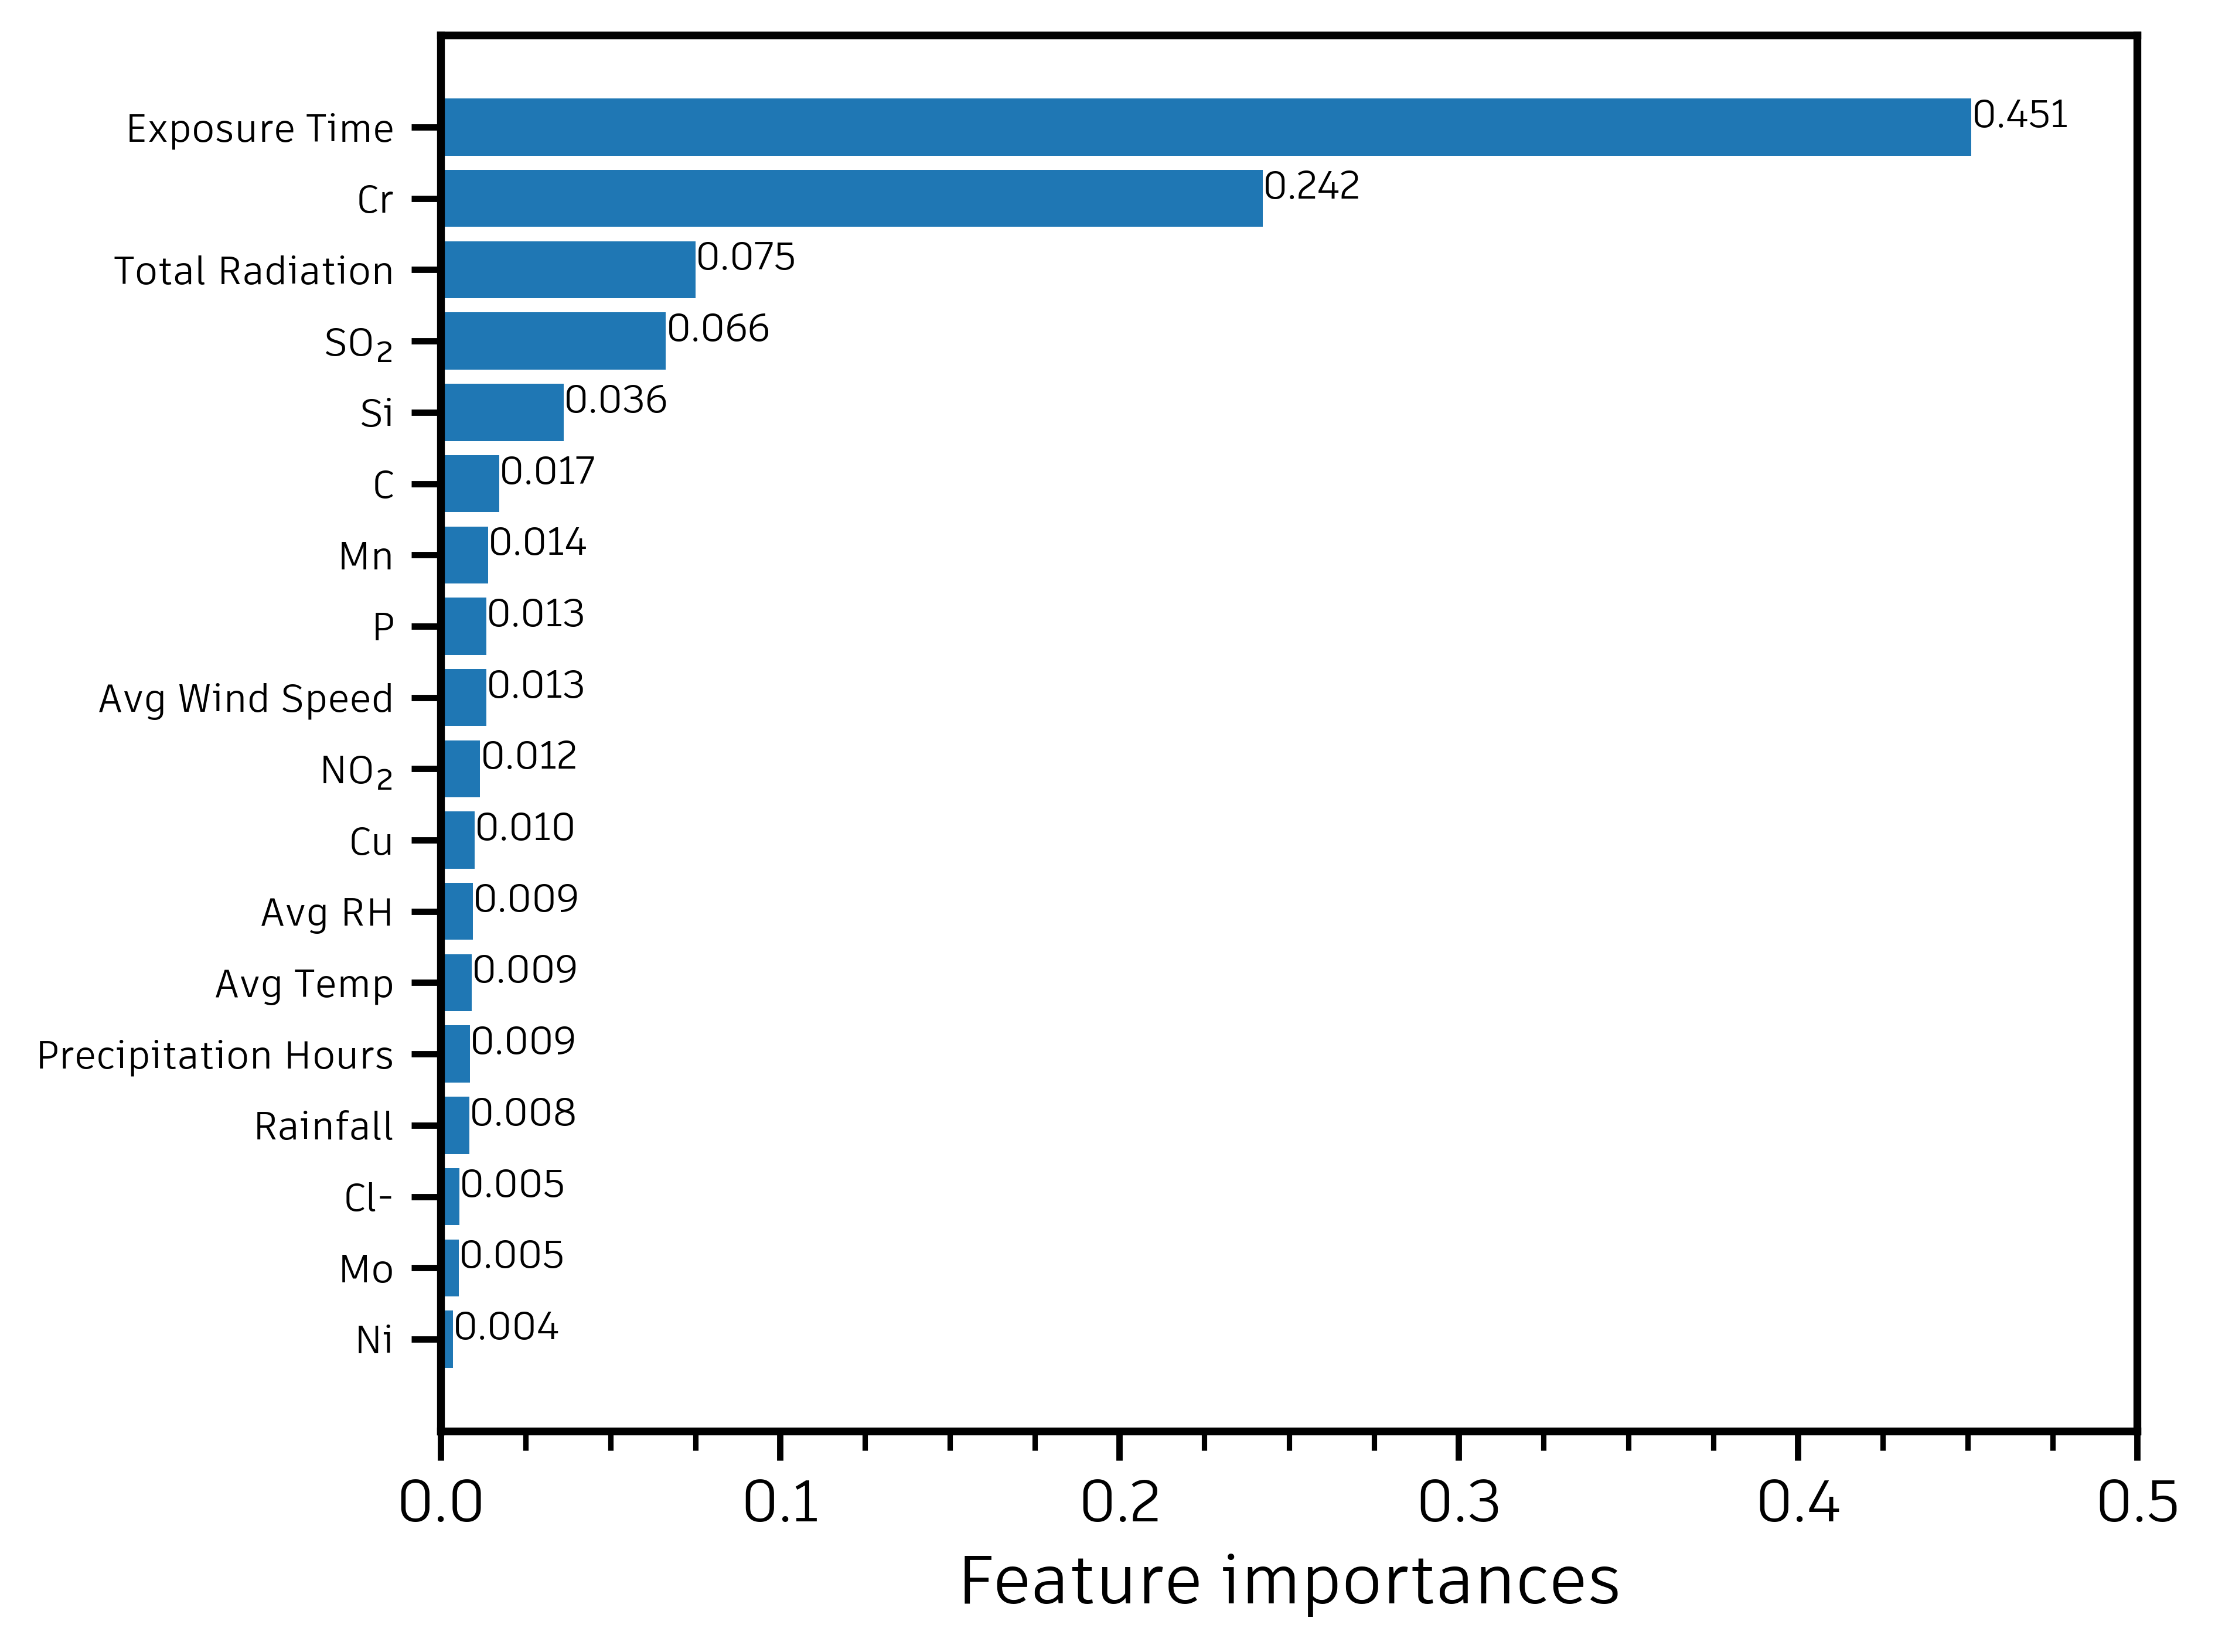

In [142]:
# 随机森林特征重要性
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# 从CSV文件加载数据
df = pd.read_excel(
    '/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/delcor_avg_human_腐蚀数据.xlsx')
y = df['腐蚀失厚率']
X = df[[
    '试验周期','C', 'Si', 'Mn', 'P', 'Cr', 'Ni', 'Cu', 'Mo', '平均温度', '平均相对湿度',
    '总辐照', '降水时数', '平均风速', '降雨量', '瞬时法SO2', '瞬时法HCL', '连续法NO2'
]]
# # 定义要尝试的树的数量范围
# n_estimators_range = [50, 100, 150, 200, 250, 300,400,500]
# # 创建一个空列表来存储OOB误差
# oob_errors = []
# # 创建一个空列表来存储特征重要性
# feature_importances = []
# 循环尝试不同的树的数量

# 标准化
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

rf_regressor = RandomForestRegressor(n_estimators=200,oob_score=True, random_state=42)
rf_regressor.fit(X_normalized, y)
print('OOB误差:', rf_regressor.oob_score_)
plt.figure(dpi=600)
plt.rcParams['font.sans-serif'] = ['Artifakt Element']
# 获取当前轴
ax = plt.gca()
# 设置直线的起点和终点
# x_start, y_start = 0.43, -0.5
# x_end, y_end = 0.43, 7.5
# # 画直线
# ax.plot([x_start, x_end], [y_start, y_end], color='red', linestyle='--')
# # 添加双箭头
# arrow_params = dict(facecolor='red', edgecolor='red', arrowstyle='<->', lw=2)
# ax.annotate('', xy=(x_start, y_start), xytext=(x_end, y_end), arrowprops=arrow_params)
# # 调整字体
# ax.text(0.45, 3.5, 'Selected features', ha='center', va='center', color='black', rotation='270',
#         fontsize=19,fontfamily='Times New Roman')
# 获取特征重要性
feature_importance = rf_regressor.feature_importances_
# 创建特征名称列表
sub_map = str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
SO2 = 'SO2'
NO2 = 'NO2'
feature_names = [
    'Exposure Time','C', 'Si', 'Mn', 'P', 'Cr', 'Ni', 'Cu', 'Mo',
    'Avg Temp', 'Avg RH', 'Total Radiation', 'Precipitation Hours',
    'Avg Wind Speed', 'Rainfall',
    SO2.translate(sub_map), 'Cl-',
    NO2.translate(sub_map)
]
# 创建数据框以便于可视化
feature_importance_df = pd.DataFrame({
    'Features': feature_names,
    'Feature importances': feature_importance
})
# 对特征重要性进行排序
feature_importance_df = feature_importance_df.sort_values(
    by='Feature importances', ascending=False)
# 可视化特征重要性排序
plt.barh(feature_importance_df['Features'],
        feature_importance_df['Feature importances'])
# 在每个条形图上添加具体数值
for index, value in enumerate(feature_importance_df['Feature importances']):
    plt.text(value, index, '{:.3f}'.format(value), fontsize=8)
plt.xlabel('Feature importances', fontsize=14)
# 添加水平虚线
# ax.axhline(y=7.5, color='red', linestyle='--', linewidth=2.1)
# 设置横纵坐标的主次刻度
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.3)
plt.tick_params(axis='x', which='minor', length=4, width=1.1)
# 设置横坐标刻度、字体大小、坐标原点对齐
plt.xticks(np.linspace(0, 0.5, 6), fontsize=12)
plt.yticks(fontsize=8)
# 设置次刻度的数量
minor_locator = AutoMinorLocator(4)
ax.xaxis.set_minor_locator(minor_locator)
# 设置边框粗细
border_width = 1.6  # 指定边框的粗细
ax = plt.gca()  # 获取当前轴
for pos in ['top', 'bottom', 'right', 'left']:
    ax.spines[pos].set_linewidth(border_width)
# 逆序显示特征
plt.gca().invert_yaxis()
plt.tight_layout()
# plt.savefig('/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/特征重要性排序.png',
#             dpi=600)
plt.show()

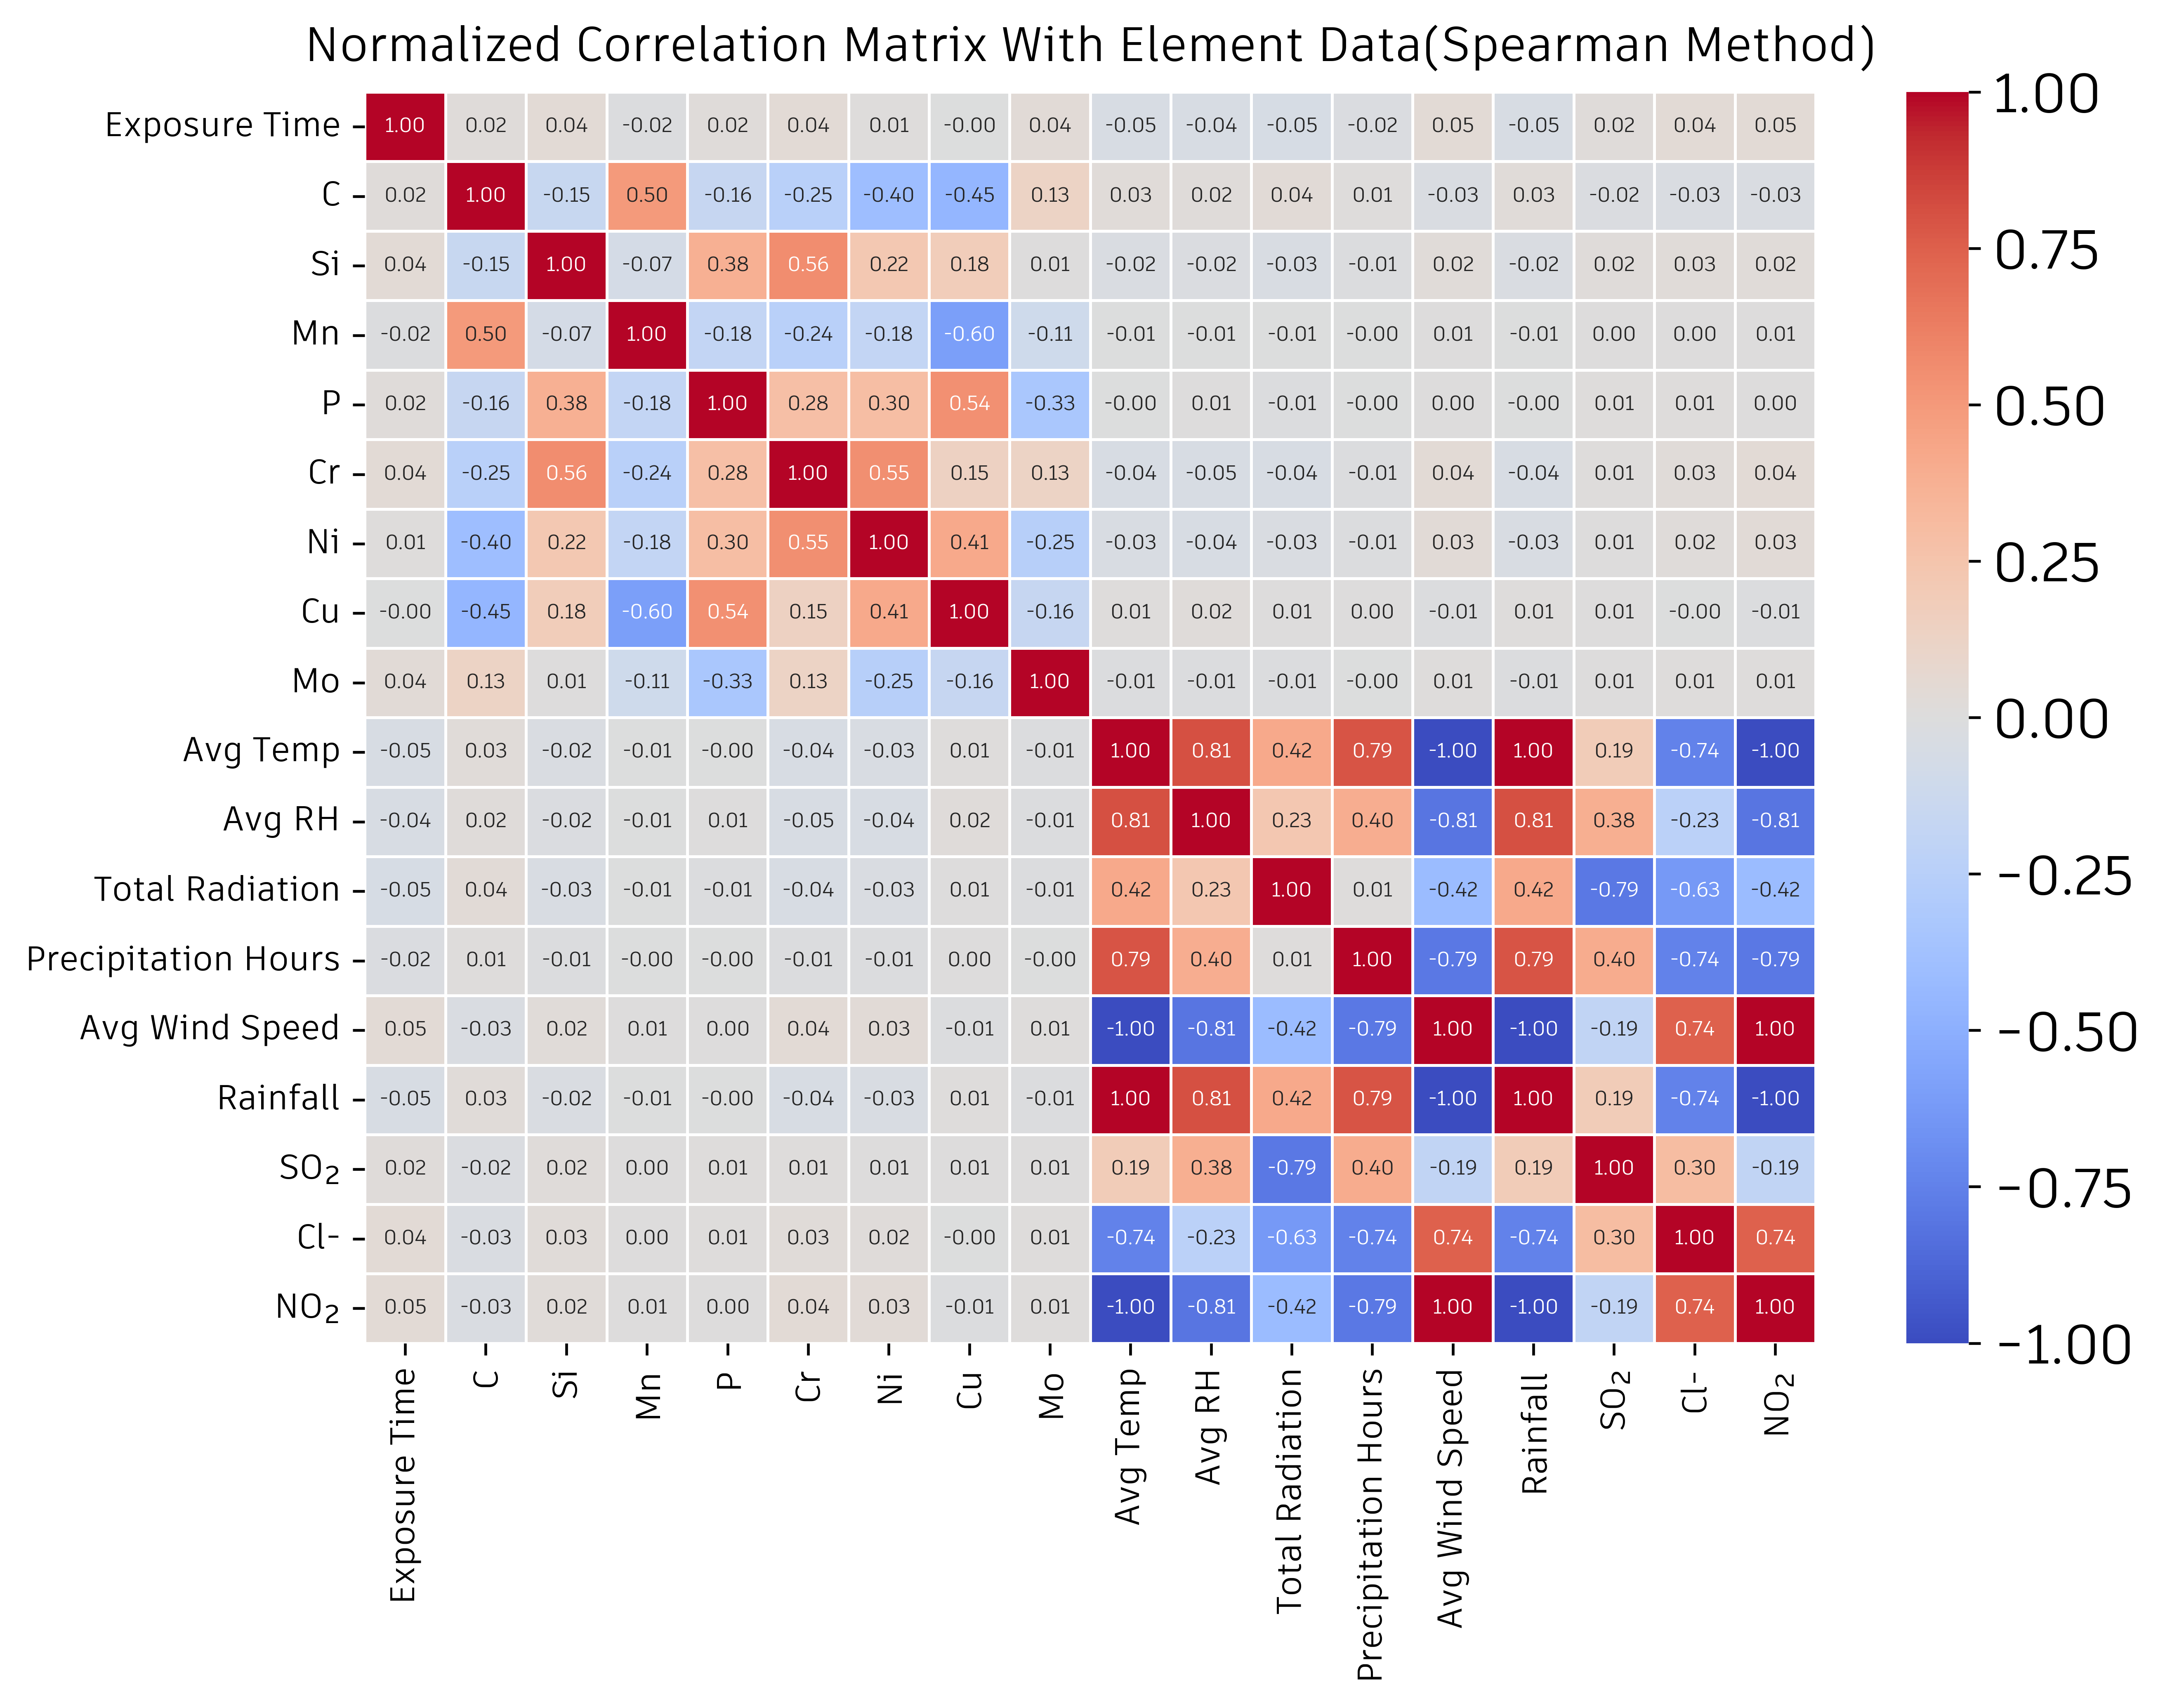

<Figure size 640x480 with 0 Axes>

In [145]:
# 归一化和相关性分析
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_excel(
    '/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/delcor_avg_human_腐蚀数据.xlsx')
# 提取特征和目标变量(重要性大于0.005的特征)
X = df[[
    '试验周期', 'C', 'Si', 'Mn', 'P', 'Cr', 'Ni', 'Cu', 'Mo', '平均温度',
    '平均相对湿度', '总辐照', '降水时数', '平均风速', '降雨量', '瞬时法SO2', '瞬时法HCL', '连续法NO2'
]]
y = df['腐蚀失厚率']
# 使用 Min-Max 归一化将特征缩放到 [0, 1] 范围内
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
sub_map = str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
SO2 = 'SO2'
NO2 = 'NO2'
# plt.ylabel('{} Concentration'.format(SO2.translate(sub_map)), fontsize=14)
normalized_data = pd.DataFrame(
    X_normalized,
    columns=[
        'Exposure Time','C', 'Si', 'Mn', 'P', 'Cr', 'Ni', 'Cu',
        'Mo', 'Avg Temp', 'Avg RH', 'Total Radiation', 'Precipitation Hours',
        'Avg Wind Speed', 'Rainfall',
        SO2.translate(sub_map), 'Cl-',
        NO2.translate(sub_map)
    ])
# 计算相关系数矩阵
method = 'spearman'  # 'spearman'可以换成 'pearson'或 'kendall'
correlation_matrix = normalized_data.corr(
    method=method)  # 'spearman'可以换成 'pearson'或 'kendall'
# 打印相关系数矩阵
# print("特征之间的相关性：")
# print(correlation_matrix)
# 可视化相关性矩阵
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7),dpi=600)
# # 设置不使用其默认自带的colorbar
# h = sns.heatmap(correlation_matrix,
#                 annot=True,
#                 cmap='coolwarm',
#                 vmin=-1,
#                 vmax=1,
#                 linewidths=0.8,
#                 cbar=False,
#                 annot_kws={"fontsize": 15})
# # 显示colorbar
# cb = h.figure.colorbar(h.collections[0])
# # 设置colorbar刻度字体大小
# cb.ax.tick_params(labelsize=15)
plt.title(
    f"Normalized Correlation Matrix With Element Data({method.capitalize()} Method)",
    fontsize=14,
    pad=9)
# 创建相关性矩阵热图
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm',
                      vmin=-1,
                      vmax=1,
                      linewidths=0.8,
                      fmt='.2f',
                      annot_kws={"fontsize": 6})
# 获取颜色条对象
cbar = heatmap.collections[0].colorbar
# 设置颜色条刻度值的字体大小
cbar.ax.tick_params(labelsize=16)  # 设置刻度值的大小为16
plt.rcParams['font.sans-serif'] = ['Artifakt Element']
plt.rcParams['axes.unicode_minus'] = True
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.savefig(
#     f'/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/相关性分析热图/带有元素信息的相关性分析({method.capitalize()}方法).jpg',
#     dpi=600)
plt.show()
plt.clf()


<Figure size 3840x2880 with 0 Axes>

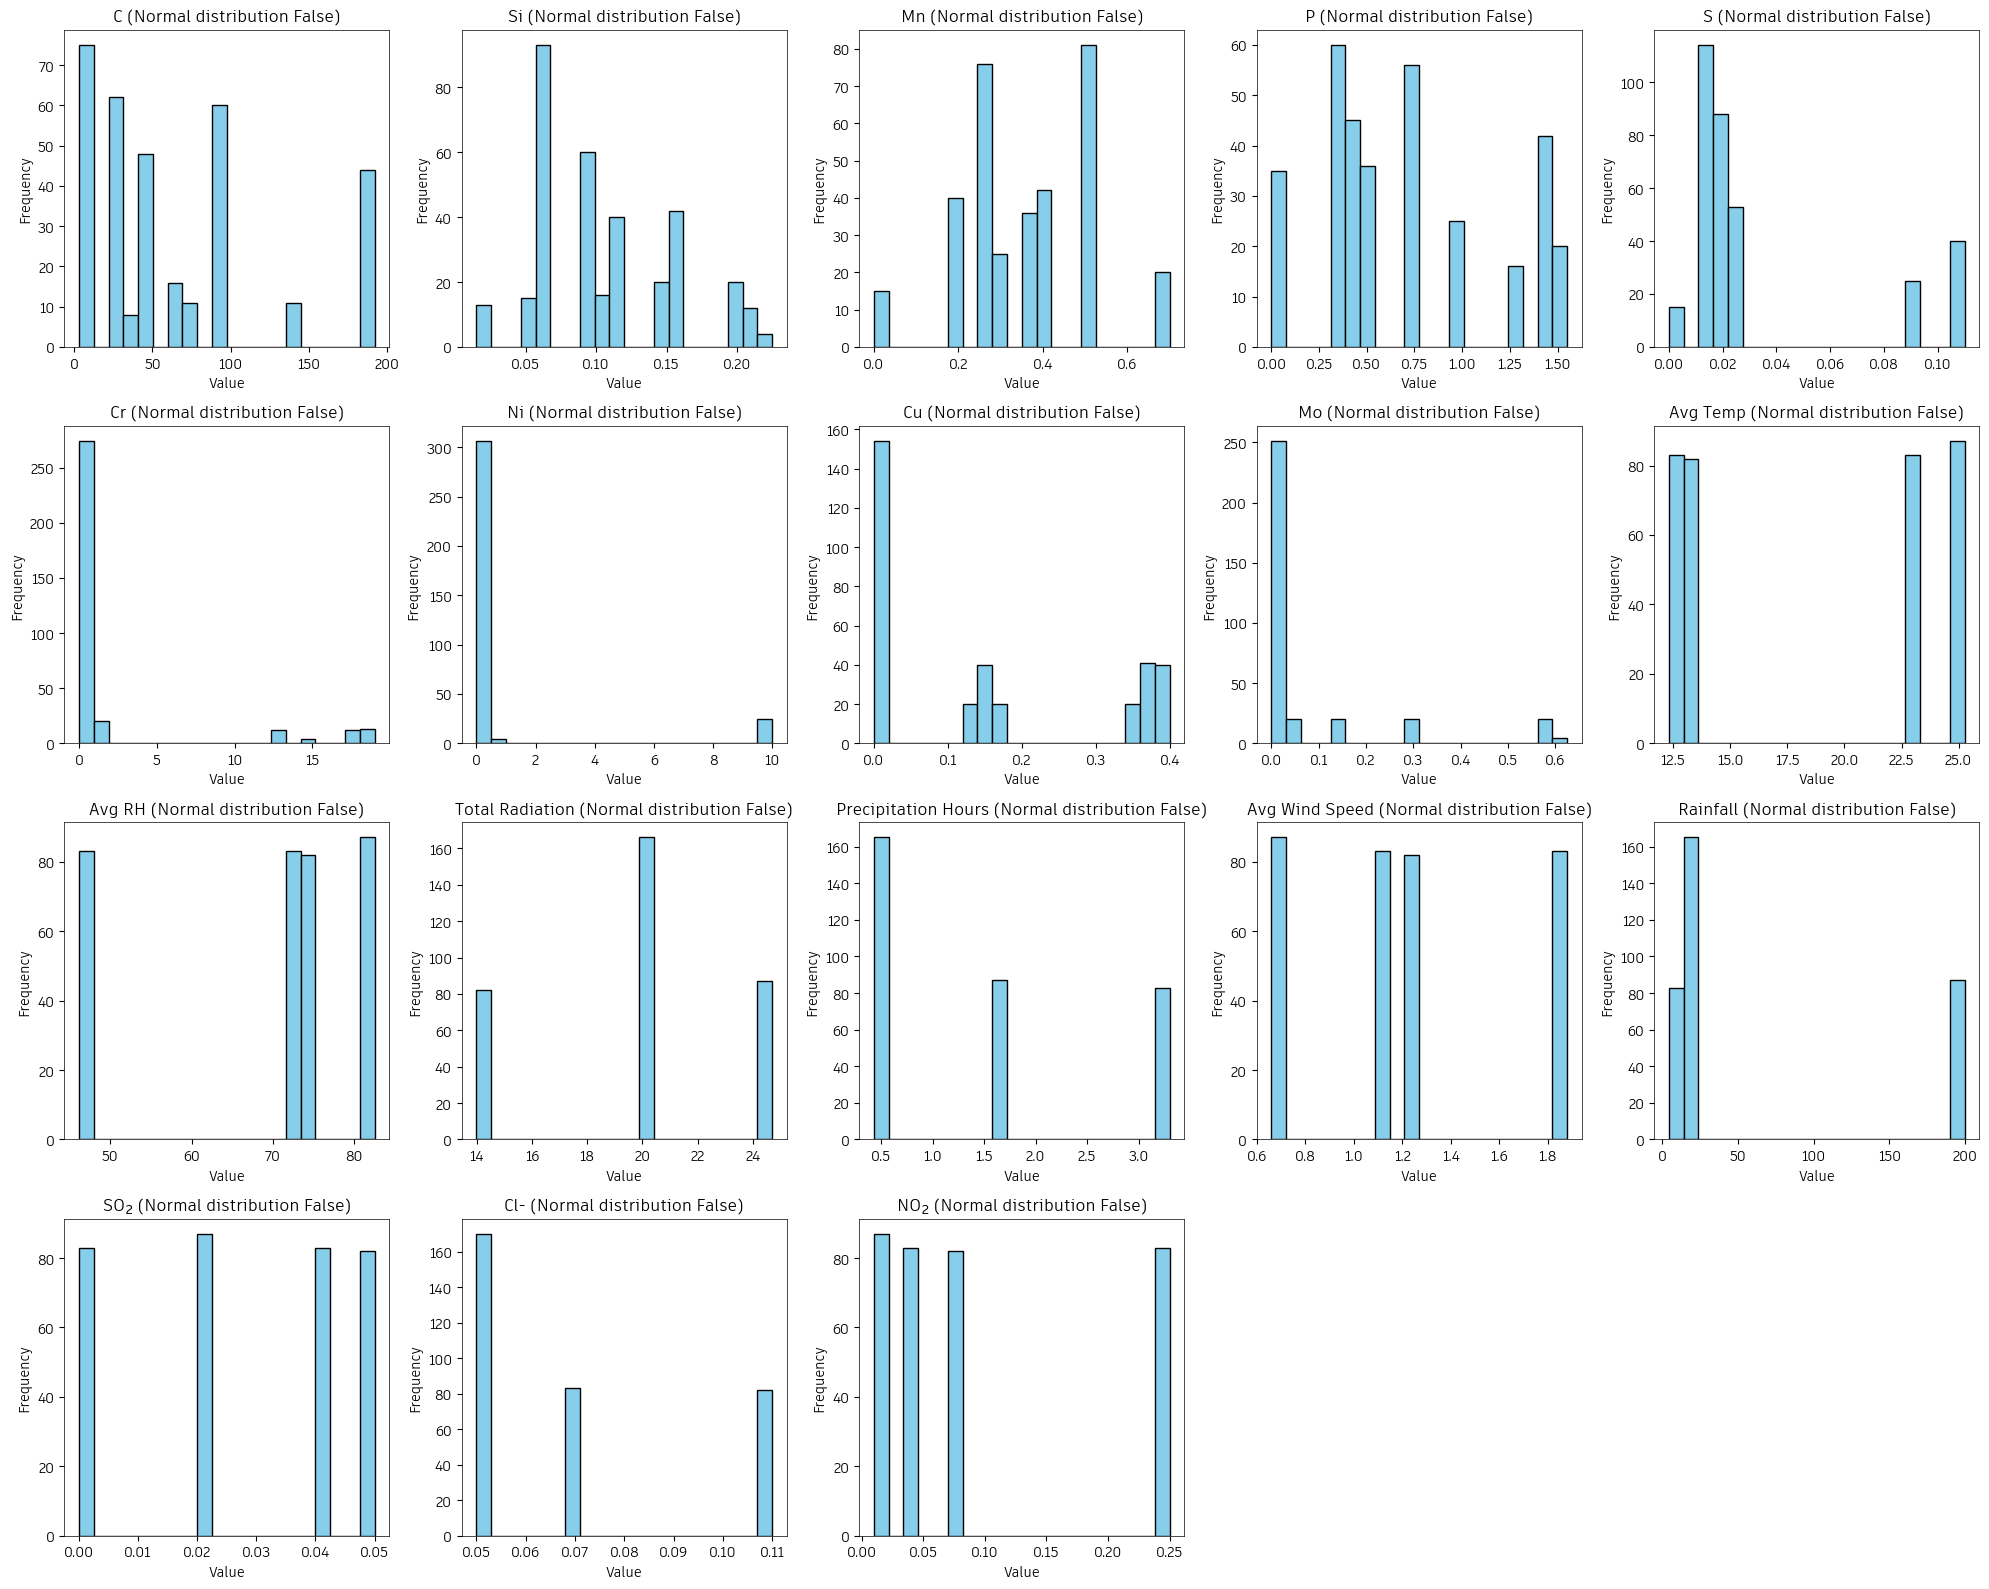

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# 检验每组变量数据的正态性并绘制直方图
plt.figure(dpi=600)
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
changes = [
    'C',
    'Si',
    'Mn',
    'P',
    'S',
    'Cr',
    'Ni',
    'Cu',
    'Mo',
    'Avg Temp',
    'Avg RH',
    'Total Radiation',
    'Precipitation Hours',
    'Avg Wind Speed',
    'Rainfall',
    SO2.translate(sub_map),
    'Cl-',
    NO2.translate(sub_map),
]
for i, column in enumerate(X.columns):
    data = X[column]
    # 正态性检验
    stat, p = shapiro(data)
    is_normal = p > 0.05

    # 绘制直方图
    axes[i].hist(data, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{changes[i]} (Normal distribution {is_normal})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    for spine in axes[i].spines.values():
        spine.set_linewidth(0.5)
fig.delaxes(axes[19])
fig.delaxes(axes[18])
plt.tight_layout()
plt.show()


Best Parameters: {'bootstrap': True, 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
训练集上的R²: 0.9809545296511927
训练集上的RMSE: 2.2334010709438683
测试集上的R²: 0.8967875646104175
测试集上的RMSE: 4.916461747409998


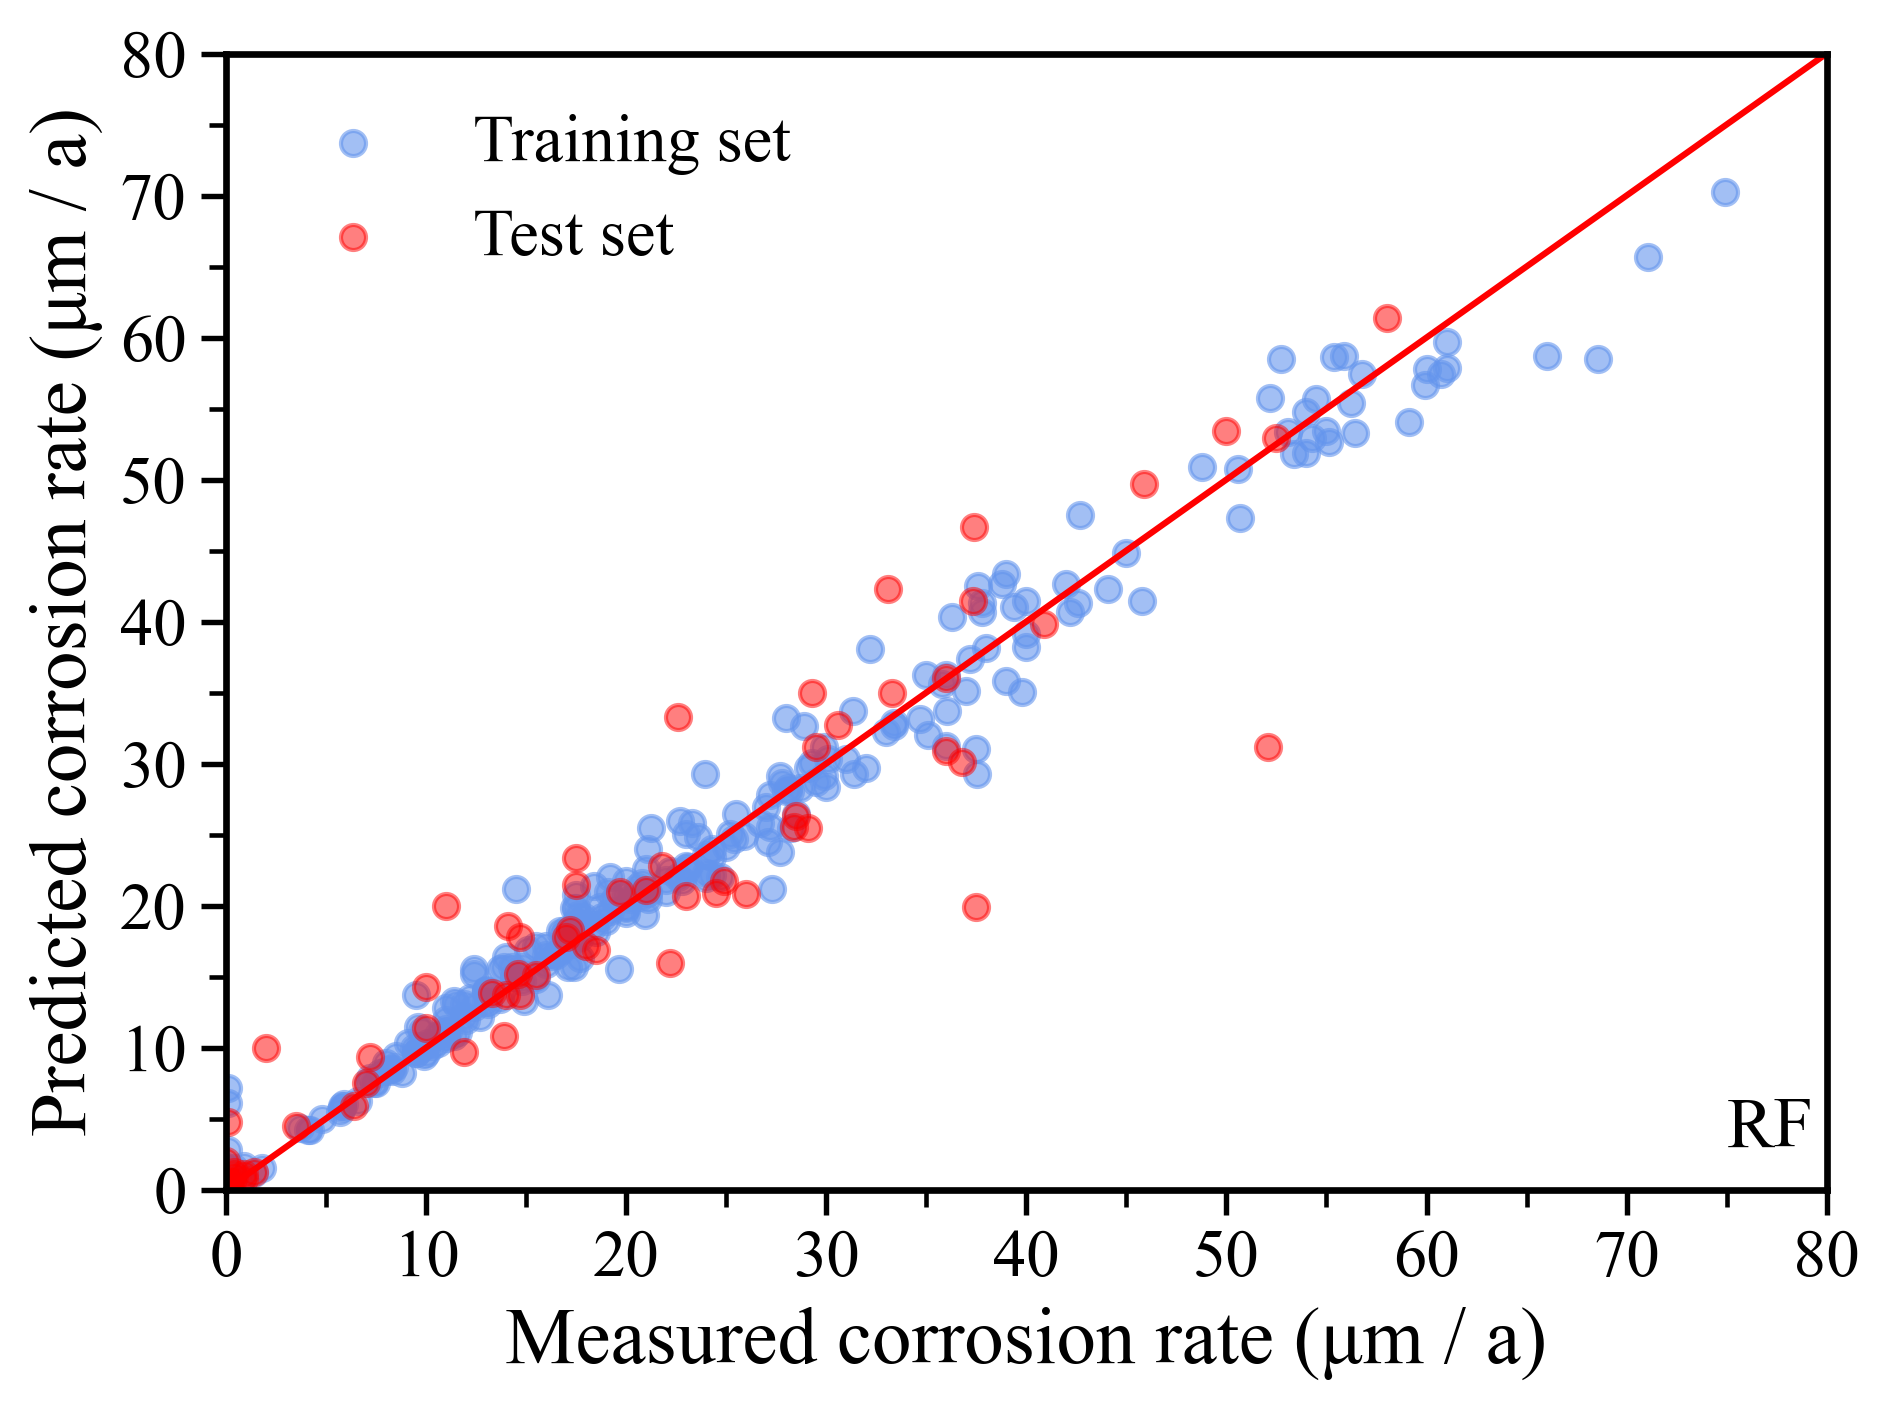

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.ticker import MultipleLocator
import math
# 加载CSV文件
df = pd.read_excel('/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/delcor_avg_human_腐蚀数据.xlsx')
X = df[[
    '试验周期', 'C', 'Si', 'Mn', 'P', 'Cr', 'Ni', 'Cu', 'Mo', '平均温度', '平均相对湿度',
    '总辐照', '降水时数', '平均风速', '瞬时法SO2', '瞬时法HCL'
]]
y = df['腐蚀失厚率']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 归一化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # 定义梯度提升树回归模型和参数网格
# param_grid = {
#     'n_estimators': [100,200,300],
#     'max_depth': [None]
#     }
# rf_regressor = RandomForestRegressor()
# # 使用网格搜索寻找最佳模型
# grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
# grid_search.fit(X_train_scaled, y_train)
# # 获取最佳参数
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer



# 创建随机森林回归模型
rf_regressor = RandomForestRegressor()
# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)
# 对训练数据进行网格搜索
grid_search.fit(X_train, y_train)
# 打印最佳参数
print("Best Parameters:", grid_search.best_params_)
best_params = grid_search.best_params_



# 使用最佳模型进行回归预测
final_RF_regressor = RandomForestRegressor(**best_params)
final_RF_regressor.fit(X_train_scaled,y_train)

# 使用最佳模型进行预测
y_train_pred = final_RF_regressor.predict(X_train_scaled)
y_test_pred = final_RF_regressor.predict(X_test_scaled)

# 评估模型
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))

print("训练集上的R²:", train_r2)
print("训练集上的RMSE:", train_rmse)
print("测试集上的R²:", test_r2)
print("测试集上的RMSE:", test_rmse)


# 创建图形
fig, ax = plt.subplots(dpi=300)

# 绘制训练集和测试集的预测结果
ax.scatter(y_train, y_train_pred, c='cornflowerblue', label='Training set',alpha=0.6)
ax.scatter(y_test, y_test_pred, c='red', label='Test set',alpha=0.5)
ax.set_xlabel('Measured corrosion rate (\u03BCm / a)', fontsize=19)
ax.set_ylabel('Predicted corrosion rate (\u03BCm / a)', fontsize=19)
plt.rcParams["axes.linewidth"] = 20                                          # 设置边框粗细

# 设置次刻度线长度和个数
x = np.linspace(0, 80, 9)
y = np.linspace(0, 80, 9)

# 设置x轴和y轴的次刻度间隔（每个主刻度之间的次刻度）
x_minor_locator = MultipleLocator(5)                                         # 设置x轴次刻度间隔为5
y_minor_locator = MultipleLocator(5)                                         # 设置y轴次刻度间隔为5

# 将刻度间隔应用到x和y轴
ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)

# 设置刻度字体大小为16
ax.tick_params(axis='both', labelsize=16)

# 设置主刻度线的长度
ax.tick_params(axis='both', which='major', length=6, width=1.3)                    # 设置主刻度线长度为5

# 设置次刻度线的长度
ax.tick_params(axis='both', which='minor', length=4, width=1.1)                    # 设置次刻度线长度为4

# 创建一组x和y坐标，这些坐标构成了对角线
x2 = [0, 80]
y2 = [0, 80]

# 使用plot函数绘制对角线,解决对角线显示不完全的问题
ax.set_xlim(0, 80)
ax.set_ylim(0, 80)
ax.plot(x2,y2,'red')
ax.text(75,3,'RF',fontsize=17)
ax.legend(fontsize=16,loc='upper left',frameon=False)

# 设置边框粗细
border_width = 1.6  # 指定边框的粗细
ax = plt.gca()  # 获取当前轴
for pos in ['top', 'bottom', 'right', 'left']:
    ax.spines[pos].set_linewidth(border_width)

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.tight_layout()
# plt.savefig(r'C:\Users\asus\Desktop\RF6.tif',dpi=600)
plt.show()

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
训练集上的R²: 0.98562508971623
训练集上的RMSE: 1.940320357438874
测试集上的R²: 0.9203751855620425
测试集上的RMSE: 4.318280689956887


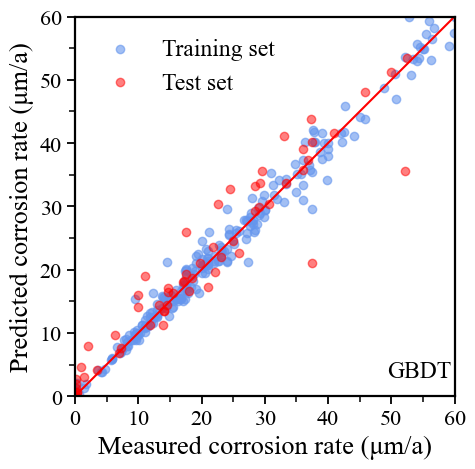

<Figure size 640x480 with 0 Axes>

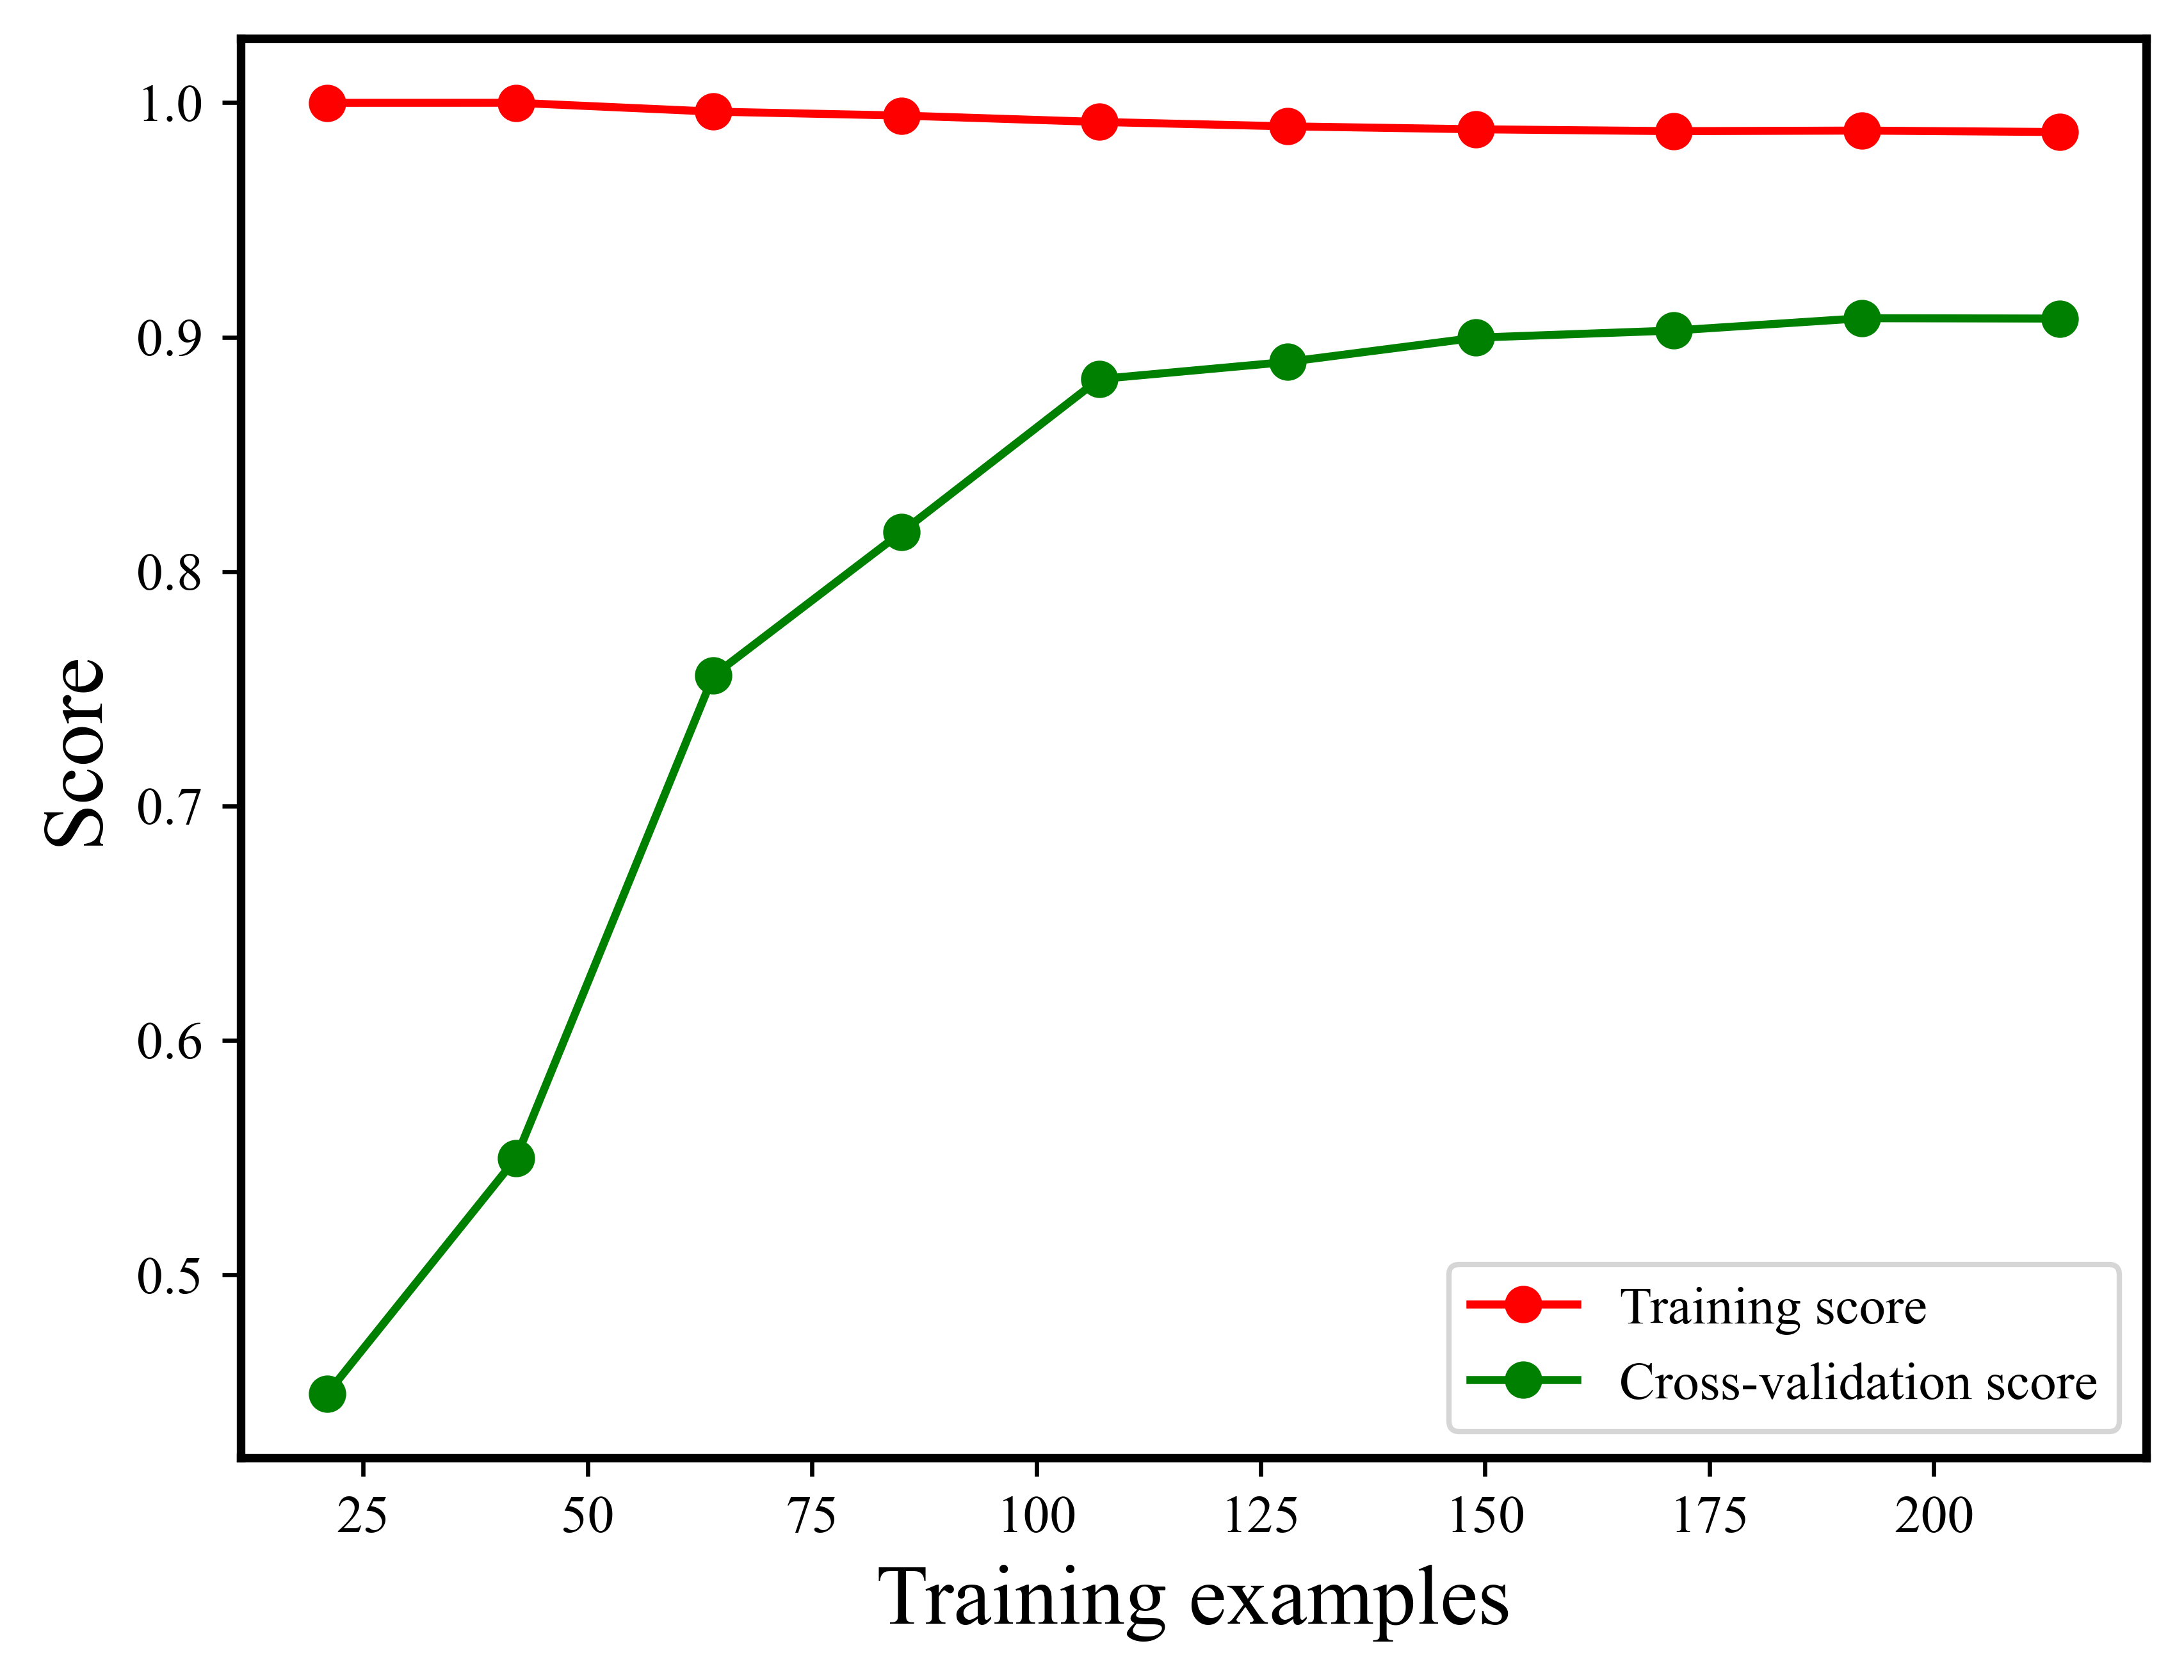

In [177]:
# GBDT（增加次刻度）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.ticker import MultipleLocator
import math
from sklearn.model_selection import learning_curve

# 加载CSV文件
df = pd.read_excel(
    '/Users/guicheng/Documents/大学/本科学业/毕业设计/腐蚀数据处理/delcor_avg_human_腐蚀数据.xlsx'
)
# X = df[['Mn','Cl','Ave_RH','Wind','Time','SO2','S']]
# X = df[['Elements','Cl','Ave_RH','Sunshine','SO2','Wind','Time']]
# X = df[['Mn','S','Ave_RH','Sunshine','Ultraviolet','SO2','Cl']]
# X = df[['Mn','S','Si','Cu','Wind','Ave_RH','Ultraviolet','SO2','Cl','Sunshine']]
X = df[[
    '试验周期', 'C', 'Si', 'Mn', 'P', 'Cr', 'Ni', 'Cu', 'Mo', '平均温度', '平均相对湿度',
    '总辐照', '降水时数', '平均风速', '瞬时法SO2', '瞬时法HCL'
]]
y = df['腐蚀失厚率']
# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 归一化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 定义梯度提升树回归模型和参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbdt_regressor = GradientBoostingRegressor()
# 使用网格搜索寻找最佳模型
grid_search = GridSearchCV(gbdt_regressor, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# # 使用最佳模型进行梯度提升决策树回归预测
final_GBDT_regressor = GradientBoostingRegressor(**best_params)
final_GBDT_regressor.fit(X_train_scaled,y_train)
# 使用最佳模型进行预测
y_train_pred = final_GBDT_regressor.predict(X_train_scaled)
y_test_pred = final_GBDT_regressor.predict(X_test_scaled)
# 评估模型
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("训练集上的R²:", train_r2)
print("训练集上的RMSE:", train_rmse)
print("测试集上的R²:", test_r2)
print("测试集上的RMSE:", test_rmse)
# 创建图形
fig, ax = plt.subplots()
# 绘制训练集和测试集的预测结果
ax.scatter(y_train, y_train_pred, c='cornflowerblue', label='Training set',alpha=0.6)
ax.scatter(y_test, y_test_pred, c='red', label='Test set',alpha=0.5)
ax.set_xlabel('Measured corrosion rate (\u03BCm/a)',fontsize=19)
ax.set_ylabel('Predicted corrosion rate (\u03BCm/a)',fontsize=19)
plt.rcParams["axes.linewidth"] = 20                                          # 设置边框粗细
# 设置次刻度线长度和个数
x = np.linspace(0, 60, 7)
y = np.linspace(0, 60, 7)
# 设置x轴和y轴的次刻度间隔（每个主刻度之间的次刻度）
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
x_minor_locator = MultipleLocator(5)                                    # 设置x轴次刻度间隔为5
y_minor_locator = MultipleLocator(5)                                    # 设置y轴次刻度间隔为5
# 将刻度间隔应用到x和y轴
ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)
# 设置刻度字体大小为16
ax.tick_params(axis='both', labelsize=16)
# 设置主刻度线的长度
ax.tick_params(axis='both', which='major', length=6, width=1.3)                    # 设置主刻度线长度为5
# 设置次刻度线的长度
ax.tick_params(axis='both', which='minor', length=4, width=1.1)                    # 设置次刻度线长度为4
# 创建一组x和y坐标，这些坐标构成了对角线
x2 = [0, 60]
y2 = [0, 60]
# 使用plot函数绘制对角线,解决对角线显示不完全的问题
ax.set_xlim(0, 60)
ax.set_ylim(0, 60)
ax.plot(x2,y2,'red')
ax.text(49.4,3,'GBDT',fontsize=17)
ax.legend(fontsize=17,loc='upper left',frameon=False)
# 设置边框粗细
border_width = 1.6  # 指定边框的粗细
ax = plt.gca()  # 获取当前轴
for pos in ['top', 'bottom', 'right', 'left']:
    ax.spines[pos].set_linewidth(border_width)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
# plt.savefig(r'C:\Users\asus\Desktop\GBDT2.jpg',dpi=600)
plt.show()
plt.clf()